In [14]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
vegetation_dat = pd.read_parquet('../Clean_Data/lon_lat_pair_weather_match_veg.parquet')

In [3]:
fire_data = pd.read_parquet('../Clean_Data/fire_data_map_weather_lon_lat.parquet')

In [4]:
vegetation_dat.shape, fire_data.shape

((17703, 4), (7626, 22))

In [5]:
vegetation_dat.dtypes

lon         float64
lat         float64
type        float32
distance    float64
dtype: object

In [6]:
fire_data.dtypes

YEAR_           int64
STATE          object
AGENCY         object
UNIT_ID        object
FIRE_NAME      object
INC_NUM        object
IRWINID        object
ALARM_DATE     object
CONT_DATE      object
C_METHOD        int64
CAUSE           int64
OBJECTIVE       int64
GIS_ACRES     float64
COMPLEX_NA     object
COMPLEX_ID     object
COMMENTS       object
FIRE_NUM       object
Shape_Leng    float64
Shape_Area    float64
lon           float64
lat           float64
distance      float64
dtype: object

In [12]:
# merge vegetation data with fire data by lon and lat, inner join
merged_data = vegetation_dat.merge(fire_data, on=['lon', 'lat'], how='inner')
merged_data.shape

(6854, 24)

In [10]:
# group by type, get the count of each type, rank by count
grouped = merged_data.groupby('type').size().reset_index(name='counts')
grouped = grouped.sort_values('counts', ascending=False)
grouped

,type,counts
3,4.0,1141
11,12.0,752
28,29.0,623
21,22.0,465
10,11.0,441
0,1.0,396
29,30.0,277
5,6.0,275
4,5.0,230
37,38.0,203


In [13]:
# type of valley is 1
merged_data = merged_data[merged_data['type'] == 1]
merged_data.shape

(396, 24)

In [16]:
# range of GIS_ACRES     
merged_data['GIS_ACRES'].describe()

count       396.000000
mean       1172.807378
std       14480.615016
min           0.002527
25%           6.979545
50%          23.116950
75%         105.250500
max      281791.000000
Name: GIS_ACRES, dtype: float64

In [17]:
# lat > 34
merged_data = merged_data[merged_data['lat'] > 34]

In [19]:
merged_data.shape

(349, 24)

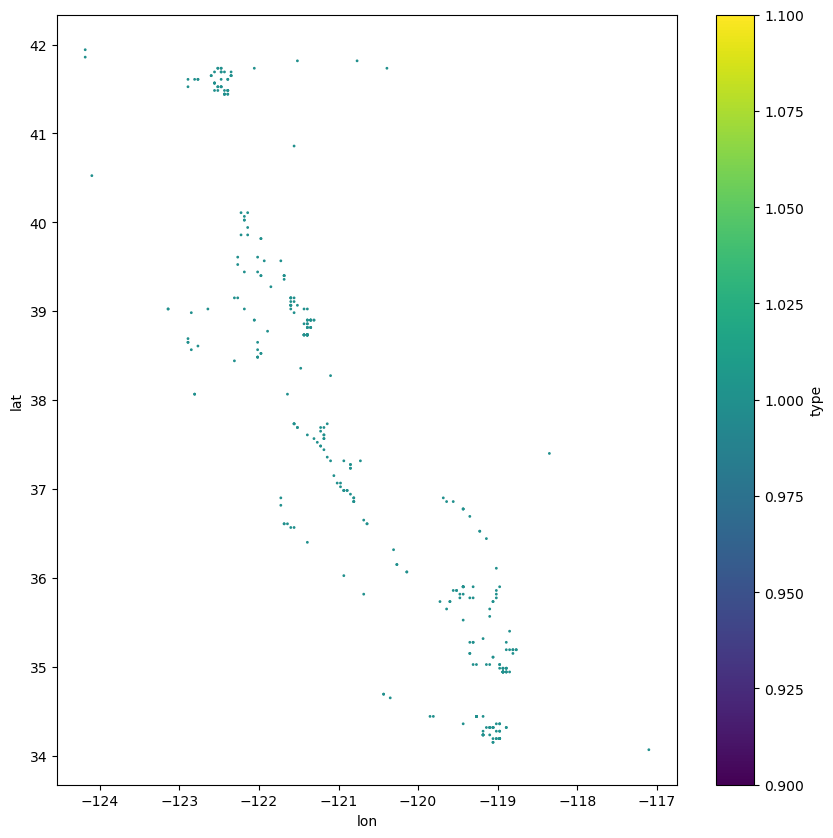

In [18]:
merged_data.plot(kind='scatter', x='lon', y='lat', c='type', cmap='viridis', s=1, figsize=(10, 10))
plt.show()